In [1]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)

Y=load_boston().target

X=load_boston().data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [3]:
print("X Shape: ",X.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)

X Shape:  (506, 13)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)


In [4]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test=scaler.transform(x_test)

In [5]:
## Adding the Price Column in the data
train_data=pd.DataFrame(x_train)

train_data['price']=y_train

train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.392039,-0.495823,-1.243999,-0.244704,-0.575806,-0.950259,0.779866,-0.394387,-0.738354,-1.274859,-0.283646,0.384408,0.226933,26.4
1,-0.397842,2.678926,-1.172446,-0.244704,-1.089803,0.409135,-1.694751,0.743625,-0.738354,-0.922598,-0.058611,0.432434,-1.168001,30.8
2,-0.386123,-0.495823,-0.353245,-0.244704,-0.301674,-0.177970,0.787145,-0.661724,-0.507047,-0.134489,1.111570,0.401938,-0.011332,20.1


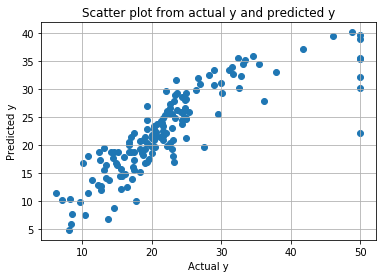

Mean Squared Error : 25.578957900421205


In [6]:
n_iter=10000

clf_ = SGDRegressor(max_iter=n_iter)

clf_.fit(x_train, y_train)

y_pred_sgd=clf_.predict(x_test)

plt.scatter(y_test,y_pred_sgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sgd))

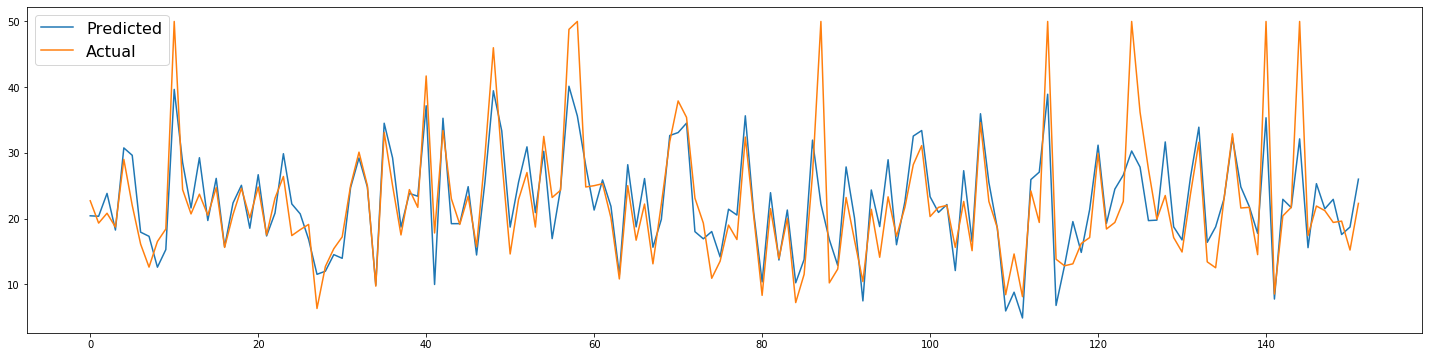

In [7]:
plt.figure(figsize=(25,6))
plt.plot(y_pred_sgd, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend(prop={'size': 16})
plt.show()